In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations
import sys
sys.path.append('../scripts') 
from functions import *
from config import nutrient_info, conversion_factors

In [2]:
df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_12004\2711278687.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')


In [3]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [4]:
df_milk = df_food_scaled[df_food_scaled['food_group'] == 'milk']
df_milk.drop_duplicates('combined_name')[['combined_name', 'QI', 'DI', 'NB']].sort_values('QI', ascending=False)

,combined_name,QI,DI,NB
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.831396,39.095091
293057,Alnatura - Hafer Drink Calcium,41.150444,0.865866,40.343560
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.865866,35.599971
284370,Berief organic oat drink nature,39.774183,0.844219,30.209971
263034,Oat milk,37.316032,0.580544,26.219814
...,...,...,...,...
310839,Biedermann Bio Vegan - Heidelbeere,0.012473,1.297993,1.247327
303820,Alnatura Coconut milk,0.008735,1.952493,0.873518
283299,ADEZ nourish your potential - Chilling Coconut,0.000000,1.397507,0.000000
294706,Innocent - Kokosnuss & Reis,0.000000,0.949274,0.000000


In [5]:
high_qi_milk = df_milk[df_milk['QI'] > 4].drop_duplicates('combined_name').sort_values('QI', ascending=False)
high_qi_milk[['combined_name', 'QI', 'DI', 'NB']]

,combined_name,QI,DI,NB
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.831396,39.095091
293057,Alnatura - Hafer Drink Calcium,41.150444,0.865866,40.343560
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.865866,35.599971
284370,Berief organic oat drink nature,39.774183,0.844219,30.209971
263034,Oat milk,37.316032,0.580544,26.219814
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,0.816838,31.388744
295808,The Original OATLY Oat Drink Whole,29.391047,0.643278,52.834138
307065,Alpro Mandel Ungesüsst,9.850806,1.054223,35.000000
314389,alpro - Mandeldrink (ohne Zucker),5.447015,1.076445,35.000000


In [6]:
ratio_cols = [i for i in high_qi_milk.columns if '_ratio_scaled' in i]

df_corr = high_qi_milk[ratio_cols + ['QI']]
corr = df_corr.corr()['QI']
corr.sort_values(ascending=True)

vitamin_b12_eaten_ratio_scaled                              -0.957302
vitamin_b2_eaten_ratio_scaled                               -0.957302
vitamin_e_activity_eaten_ratio_scaled                       -0.921657
calcium_eaten_ratio_scaled                                  -0.915731
salt_eaten_ratio_scaled                                     -0.841018
protein_eaten_ratio_scaled                                  -0.723873
fat_eaten_ratio_scaled                                      -0.716851
vitamin_d_eaten_ratio_scaled                                -0.673757
fiber_eaten_ratio_scaled                                    -0.562378
fatty_acids_saturated_eaten_ratio_scaled                    -0.216805
phosphorus_eaten_ratio_scaled                                0.161132
sugar_eaten_ratio_scaled                                     0.754168
magnesium_eaten_ratio_scaled                                 0.995657
potassium_eaten_ratio_scaled                                 0.995657
pantothenic_acid_eat

## Pantothenic acid

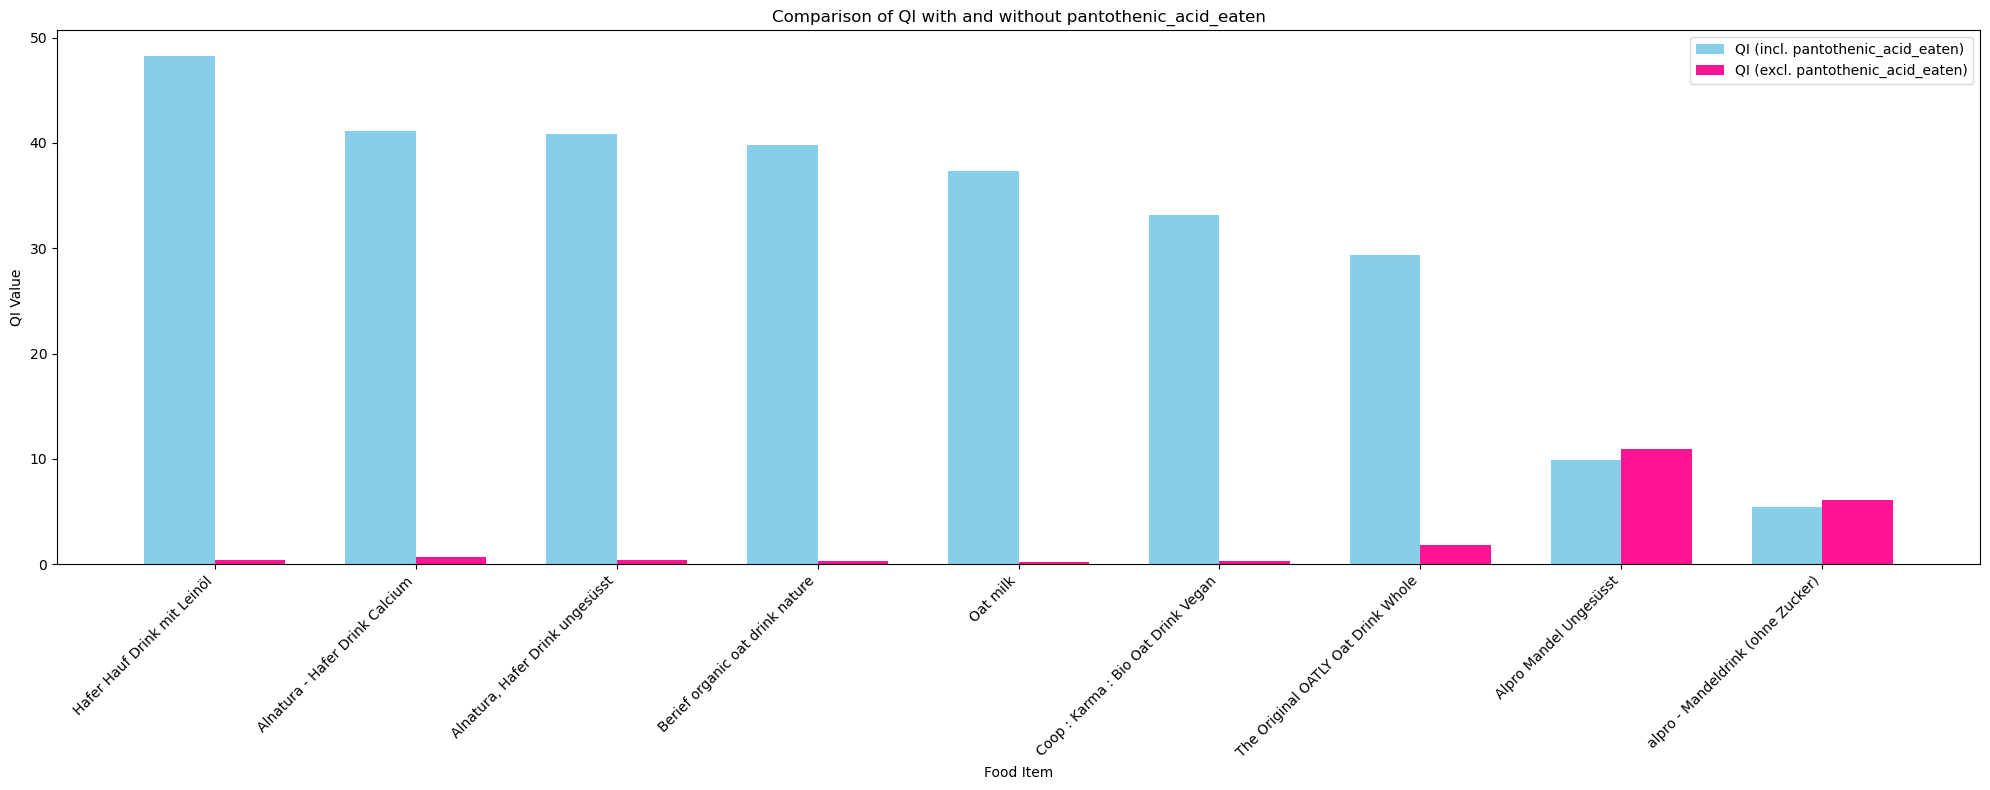

,combined_name,QI,QI_excl_pantothenic_acid_eaten,QI_diff,QI_pct_change
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.443930,47.834395,99.080478
293057,Alnatura - Hafer Drink Calcium,41.150444,0.708471,40.441973,98.278340
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.369439,40.475877,99.095516
284370,Berief organic oat drink nature,39.774183,0.304648,39.469535,99.234056
263034,Oat milk,37.316032,0.252034,37.063999,99.324597
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,0.295137,32.887153,99.110558
295808,The Original OATLY Oat Drink Whole,29.391047,1.857499,27.533548,93.680052
307065,Alpro Mandel Ungesüsst,9.850806,10.945340,-1.094534,-11.111111
314389,alpro - Mandeldrink (ohne Zucker),5.447015,6.052239,-0.605224,-11.111111


In [7]:
df_milk_pantothenic_acid = compare_qi_excluding_nutrient(df=high_qi_milk, nutrient_to_exclude='pantothenic_acid_eaten', qualifying_nutrients=qualifying_nutrients)

df_milk_pantothenic_acid

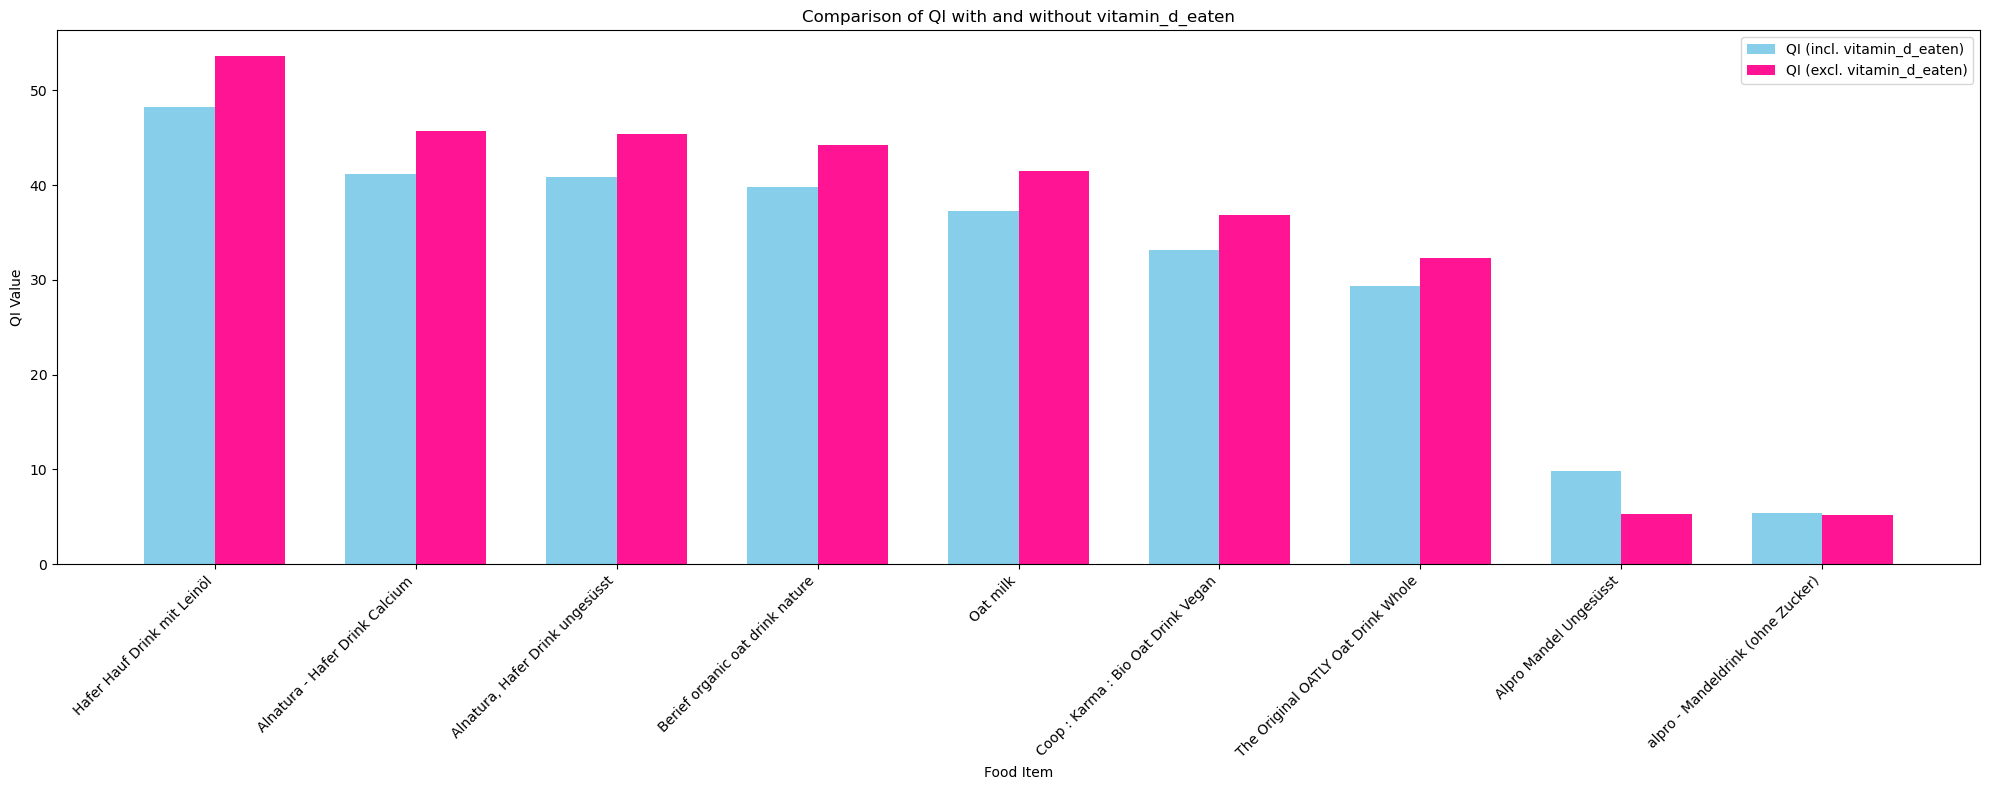

,combined_name,QI,QI_excl_vitamin_d_eaten,QI_diff,QI_pct_change
302464,Hafer Hauf Drink mit Leinöl,48.278325,53.642583,-5.364258,-11.111111
293057,Alnatura - Hafer Drink Calcium,41.150444,45.722716,-4.572272,-11.111111
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,45.383684,-4.538368,-11.111111
284370,Berief organic oat drink nature,39.774183,44.193537,-4.419354,-11.111111
263034,Oat milk,37.316032,41.462258,-4.146226,-11.111111
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,36.869211,-3.686921,-11.111111
295808,The Original OATLY Oat Drink Whole,29.391047,32.266856,-2.875808,-9.784641
307065,Alpro Mandel Ungesüsst,9.850806,5.247334,4.603472,46.731931
314389,alpro - Mandeldrink (ohne Zucker),5.447015,5.197538,0.249477,4.580067


In [8]:
df_milk_vitamin_d = compare_qi_excluding_nutrient(df=high_qi_milk, nutrient_to_exclude='vitamin_d_eaten', qualifying_nutrients=qualifying_nutrients)

df_milk_vitamin_d